# Fibonacci sequence and exponentiation by squaring

In [1]:
import matplotlib.pyplot as plt
from timeit import timeit

In [2]:
def plot(x,y):
    plt.plot(x,y)
    plt.show()

In [3]:
def measure_time(fun, n):
    return timeit(
        stmt=f'{fun}({n})',
        number=1,
        globals=globals(),
    )

## First, naïve version

In [4]:
def fib_0(n):
    if n < 2:
        return n
    return fib_0(n-1)+fib_0(n-2)

In [5]:
fib_0(30)

832040

### Let us evaluate it

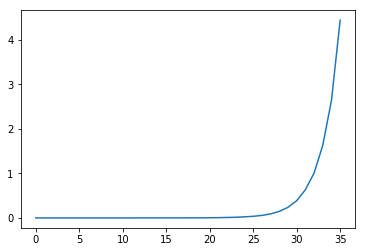

In [24]:
args = list(range(0,36))
outcomes = [measure_time('fib_0', i) for i in args]
plot(args, outcomes)

## Second, smarter version

In [7]:
def cached(fun):
    cache = {}
    def result(n):
        if n not in cache:
            cache[n] = fun(n)
        return cache[n]
    return result

In [8]:
@cached
def fib_1(n):
    if n < 2:
        return n
    return fib_1(n-1)+fib_1(n-2)

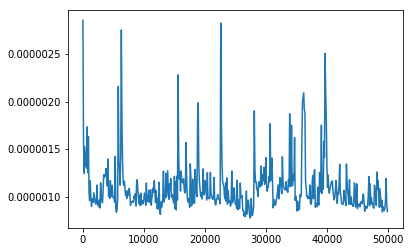

In [28]:
args = list(range(0, 50000, 100))
outcomes = [measure_time('fib_1', i) for i in args]
plot(args, outcomes)

The plot seems a bit strange. In fact, the complexity is O(n) in the first run, and O(1) in any following run.

## Third, linear solution

The previous one was due to a Python trick with decorated, cached-outcomes function.
Let's see, how to do it without tricks with cache and any other Python-related things.

In [10]:
def fib_2(n):
    a, b = 0, 1
    while n:
        a, b = b, a+b
        n -= 1
    return a

In [30]:
fib_2(500)

139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125

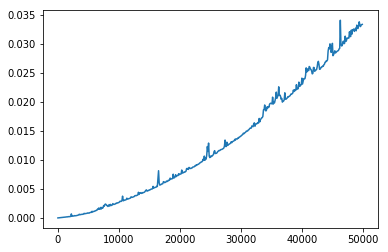

In [29]:
args = list(range(0, 50000, 100))
outcomes = [measure_time('fib_2', i) for i in args]
plot(args, outcomes)

It is linear time, when we count number of additions. Note that the bigger a number is, the longer it takes to add two of them, so practically the algorithm complexity is some more than O(n).

## Yes we can!
### ...do it faster

In [13]:
class Matrix2x2:
    
    def __init__(self, m):
        self.m = m
        
    def __mul__(self, other):
        m1 = self.m
        m2 = other.m
        return Matrix2x2([
            m1[0]*m2[0]+m1[1]*m2[2],
            m1[0]*m2[1]+m1[1]*m2[3],
            m1[2]*m2[0]+m1[3]*m2[2],
            m1[2]*m2[1]+m1[3]*m2[3],
        ])
    
    @staticmethod
    def starting():
        return Matrix2x2([1, 1, 1, 0])
    
    @staticmethod
    def one():
        return Matrix2x2([1, 0, 0, 1])
    
    def __pow__(self, exponent):
        if exponent == 0:
            return Matrix2x2.one()
        if exponent == 1:
            return self
        if exponent % 2 == 0:
            to_square = self**(exponent//2)
            return to_square * to_square
        else:
            to_square = self**(exponent//2)
            return to_square * to_square * self
    
def fib_3(n):
    return (Matrix2x2.starting()**n).m[1]

fib_3(500)

139423224561697880139724382870407283950070256587697307264108962948325571622863290691557658876222521294125

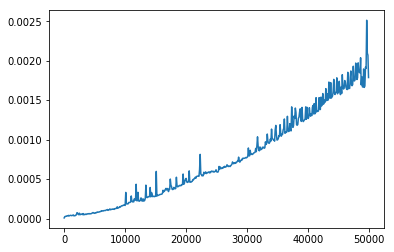

In [14]:
args = list(range(0, 50000, 100))
outcomes = [measure_time('fib_3', i) for i in args]
plot(args, outcomes)

It is hard to see it, but in number of additions the above algorithm has O(log(n)) complexity. In fact it is an order of multiplications. As previously: multiplying big numbers takes quadratic time in the sense of its length.

## Appendix - logarithm function

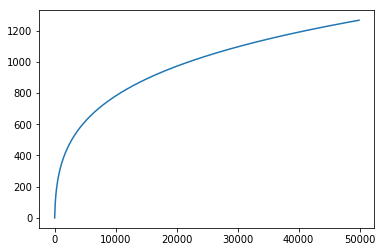

In [33]:
from math import log
args = list(range(1, 50000, 100))
outcomes = [log(i)**3 for i in args]
plot(args, outcomes)